In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
import contextily as cx

/Users/jnapolitano/venvs/finance/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
shapefilepath = "/Users/jnapolitano/Projects/rail-mapping/North_American_Rail_Nodes/North_American_Rail_Nodes.shp"

node_df = gpd.read_file(shapefilepath)



node_df.head()

,OBJECTID,FRANODEID,COUNTRY,STATE,STFIPS,CTYFIPS,STCYFIPS,FRADISTRCT,PASSNGR,PASSNGRSTN,BNDRY,geometry
0,1,300000,US,HI,15,009,15009,7,None,None,0,POINT (-156.68973 20.93653)
1,2,300001,US,HI,15,009,15009,7,None,None,0,POINT (-156.68972 20.93916)
2,3,300002,US,HI,15,009,15009,7,None,None,0,POINT (-156.67932 20.88014)
3,4,300003,US,HI,15,009,15009,7,None,None,0,POINT (-156.67863 20.88102)
4,5,300004,US,AK,02,170,02170,8,None,None,0,POINT (-150.12336 62.39174)


In [3]:
node_df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [4]:
df_wm = node_df.to_crs(epsg=3857)

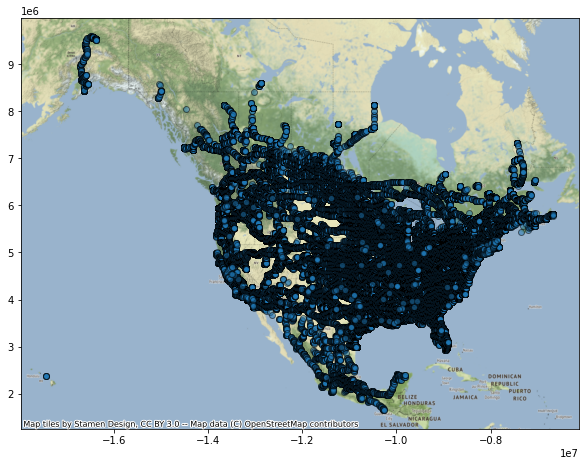

In [5]:
ax = df_wm.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
cx.add_basemap(ax, zoom=5)

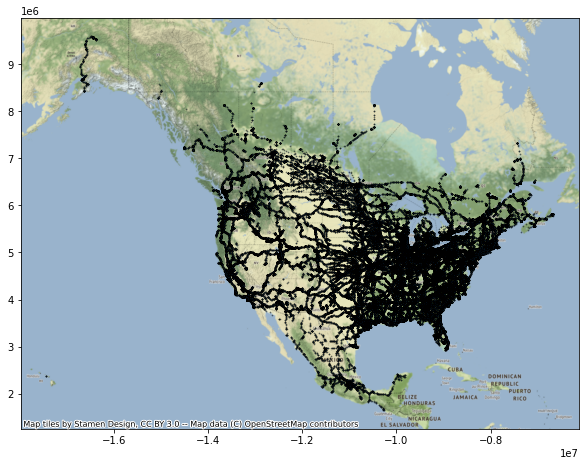

In [6]:
ax = df_wm.plot(figsize=(10, 10), alpha=0.5, edgecolor='k', markersize = .5)
cx.add_basemap(ax, zoom=5)

In [7]:
df_wm.head()

,OBJECTID,FRANODEID,COUNTRY,STATE,STFIPS,CTYFIPS,STCYFIPS,FRADISTRCT,PASSNGR,PASSNGRSTN,BNDRY,geometry
0,1,300000,US,HI,15,009,15009,7,None,None,0,POINT (-17442620.562 2384312.109)
1,2,300001,US,HI,15,009,15009,7,None,None,0,POINT (-17442620.281 2384624.961)
2,3,300002,US,HI,15,009,15009,7,None,None,0,POINT (-17441462.226 2377592.829)
3,4,300003,US,HI,15,009,15009,7,None,None,0,POINT (-17441385.698 2377697.091)
4,5,300004,US,AK,02,170,02170,8,None,None,0,POINT (-16711656.316 8952635.016)


In [8]:
df_wm['PASSNGR'].unique()

array([None, 'A', 'C', 'B', 'b', 'R'], dtype=object)

In [9]:
results = df_wm['PASSNGRSTN'].unique()
print(results)

[None 'Albany' 'Eugene' ... 'Chelsea' 'Rockport'
 '59th St. (U. of Chicago)']


In [10]:
results = df_wm['FRADISTRCT'].unique()
print(results)

[ 7  8 99  6  5  4  3  2  1]


In [11]:
shapefilepath = "/Users/jnapolitano/Projects/rail-mapping/North_American_Rail_Lines/North_American_Rail_Lines.shp"

line_df = gpd.read_file(shapefilepath)



line_df.head()

,OBJECTID,FRAARCID,FRFRANODE,TOFRANODE,STFIPS,CNTYFIPS,STCNTYFIPS,STATEAB,COUNTRY,FRADISTRCT,...,CARDDIRECT,NET,MILES,KM,TIMEZONE,IM_RT_TYPE,DBLSTK,Shape_Leng,ShapeSTLen,geometry
0,1,300000,348741,348746,38,015,38015,ND,US,8,...,None,M,0.178101,0.286626,C,None,None,0.003194,418.656759,"LINESTRING (-100.74521 46.80285, -100.74509 46..."
1,2,300001,338567,338686,30,087,30087,MT,US,8,...,None,O,0.886585,1.426824,M,None,None,0.017227,2047.012225,"LINESTRING (-106.65759 45.86405, -106.65769 45..."
2,3,300002,330112,330117,16,031,16031,ID,US,8,...,None,M,0.221820,0.356985,M,None,None,0.004269,483.919572,"LINESTRING (-113.78532 42.54225, -113.78342 42..."
3,4,300003,330113,330116,16,031,16031,ID,US,8,...,None,I,0.127571,0.205306,M,None,None,0.002484,278.254150,"LINESTRING (-113.78484 42.54231, -113.78482 42..."
4,5,300004,329497,329504,16,063,16063,ID,US,8,...,None,M,0.447515,0.720207,M,DS,UP-DS,0.008412,982.887938,"LINESTRING (-114.40776 42.93610, -114.40763 42..."


In [12]:
line_df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:
line_wm = line_df.to_crs(epsg=3857)

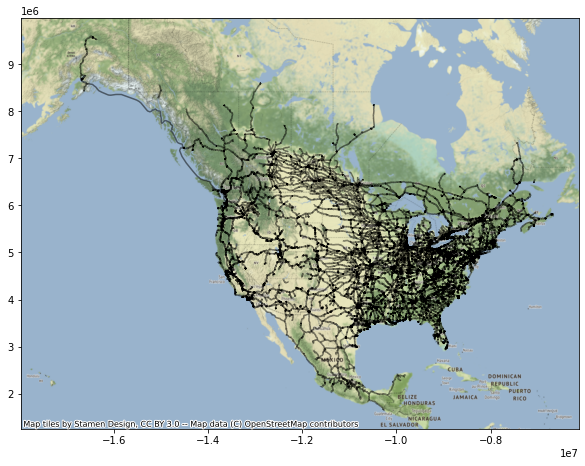

In [14]:
ax = line_wm.plot(figsize=(10, 10), alpha=0.5, edgecolor='k', markersize = .5)
cx.add_basemap(ax, zoom=5)

In [15]:
line_wm.columns

Index(['OBJECTID', 'FRAARCID', 'FRFRANODE', 'TOFRANODE', 'STFIPS', 'CNTYFIPS',
       'STCNTYFIPS', 'STATEAB', 'COUNTRY', 'FRADISTRCT', 'RROWNER1',
       'RROWNER2', 'RROWNER3', 'TRKRGHTS1', 'TRKRGHTS2', 'TRKRGHTS3',
       'TRKRGHTS4', 'TRKRGHTS5', 'TRKRGHTS6', 'TRKRGHTS7', 'TRKRGHTS8',
       'TRKRGHTS9', 'DIVISION', 'SUBDIV', 'BRANCH', 'YARDNAME', 'PASSNGR',
       'STRACNET', 'TRACKS', 'CARDDIRECT', 'NET', 'MILES', 'KM', 'TIMEZONE',
       'IM_RT_TYPE', 'DBLSTK', 'Shape_Leng', 'ShapeSTLen', 'geometry'],
      dtype='object')

In [16]:
line_wm.STRACNET.unique()

array([None, 'S', 'C'], dtype=object)